<a href="https://colab.research.google.com/github/2303A51528/DM1528/blob/main/15apr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install ydata_profiling
import warnings # Importing the warnings module
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

%matplotlib inline
import numpy as np
import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import plotly.express as px
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from ydata_profiling import ProfileReport
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

In [ ]:
df = pd.DataFrame(pd.read_csv('/content/Country-data.csv'))
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [ ]:
report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 84.60it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [ ]:
n_rows = df.shape[0]

In [ ]:
n_cols = df.shape[1]

In [ ]:
print("The number of rows is: ", n_rows)
print("The number of columns is: ", n_cols)

The number of rows is:  167
The number of columns is:  10


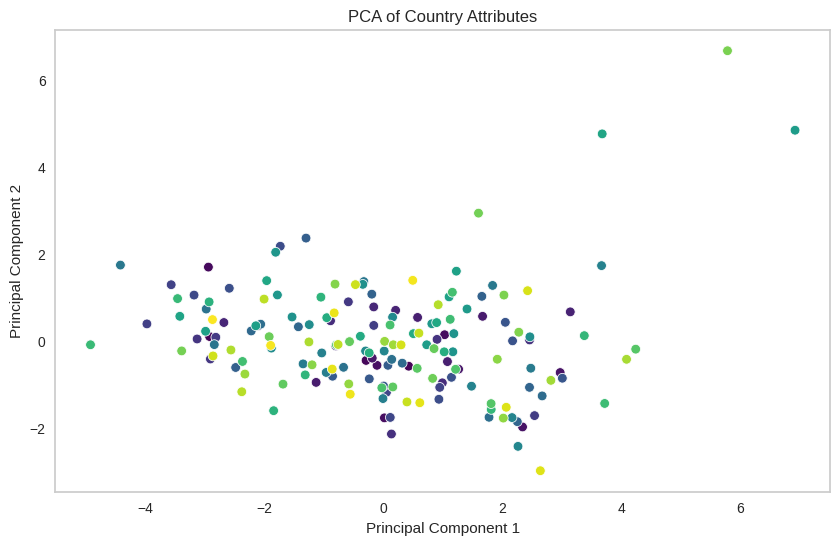

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Country-data.csv')  # Replace with the correct file path
attributes = data.drop(['country'], axis=1)  # Exclude non-numeric column if necessary

# Standardize the attributes
scaler = StandardScaler()
attributes_scaled = scaler.fit_transform(attributes)

# Perform PCA
pca = PCA(n_components=2)  # Reducing to 2 components
pca_transformed = pca.fit_transform(attributes_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_transformed, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Country'] = data['country']

# Visualize the PCA-transformed data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Principal Component 1',
    y='Principal Component 2',
    data=pca_df,
    hue='Country',
    palette='viridis',
    legend=None  # Hide legend for better visualization
)
plt.title('PCA of Country Attributes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()